# Machine Learning

### Decision Tree







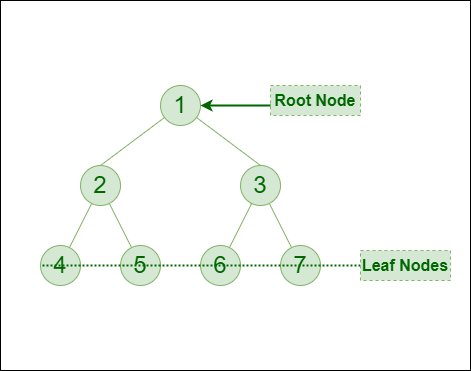

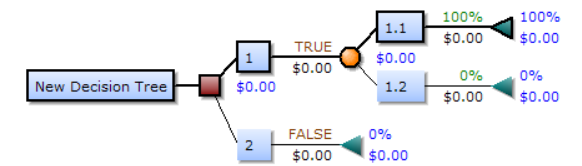

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
<br>
For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

In [38]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 
%matplotlib qt

# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame for easier exploration
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map numeric target to actual species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the DataFrame
print(iris_df.head())

# Create a pairplot
sns.pairplot(iris_df, hue='species', markers=['o', 's', 'D'])
plt.show()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [45]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target



# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [46]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

DTmodel = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# prediction 
y_pred = DTmodel.predict(X_test)

In [48]:
# Evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(f'Accuracy: {accuracy * 100:.2f}%')

0.9066666666666666
Accuracy: 90.67%


In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(f"confusion matrix :\n{confusion_matrix(y_test,y_pred)}")
print("="*20)
print(f"classification report:\n{classification_report(y_test,y_pred)}")
print("-"*60)
print(f"DecisionTree score :{DTmodel.score(X_test,y_test)}")

confusion matrix :
[[29  0  0]
 [ 0 20  3]
 [ 0  4 19]]
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.83      0.87      0.85        23
           2       0.86      0.83      0.84        23

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75

------------------------------------------------------------
DecisionTree score :0.9066666666666666


In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(DTmodel, feature_names=iris.feature_names, class_names=iris.target_names.tolist(), filled=True)
plt.show()